문제08_시계열데이터.txt

애플의 시계열 주가 데이터를 학습하고 예측하는 문제입니다. 

apple_stock.csv  파일에   종가(close) 를  5일단위로 학습하고  

4일치 애플 주식의 종가(close) 데이터가 입력되면 
그 다음날 애플 주식의 종가(close)를 예측하는 프로그램을 작성하세요. 

sequence to vector

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
apple = pd.read_csv('apple_stock.csv', index_col='Date')
apple.index = pd.to_datetime(apple.index)

In [2]:
a = apple['Close']

In [3]:
a = np.array(a)
a = a.reshape(-1,1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
aa = scaler.fit_transform(a)

In [5]:
aa = aa.reshape(-1,5,1)

In [6]:
aa.shape

(453, 5, 1)

In [7]:
X_train = aa[0:453, 0:4, 0]
X_train = X_train.reshape(-1,4,1)

In [8]:
Y_train = aa[0:453, 4, 0]
Y_train = Y_train.reshape(-1,1)

In [9]:
print(X_train.shape)
print(Y_train.shape)

(453, 4, 1)
(453, 1)


In [10]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.layers import TimeDistributed

def make_model():
    model = Sequential()
    model.add(SimpleRNN(10, input_shape=(4,1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='sgd')
    return model

In [16]:
model = make_model()
history = model.fit(X_train, Y_train, epochs=300, validation_split=0.2, verbose=0)

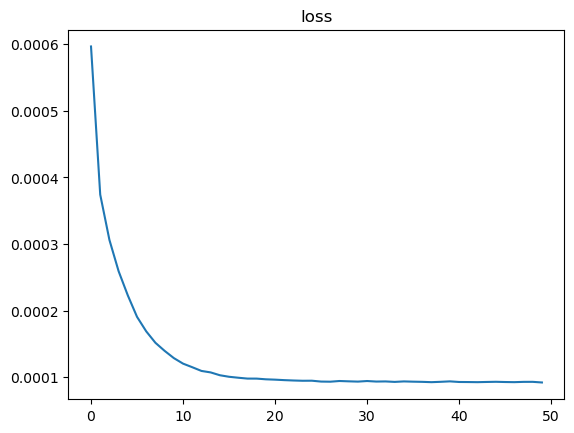

In [17]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

In [18]:
y_predict = model.predict(aa[4, 0:4,0].reshape(-1,4,1))
print(y_predict)
print(aa[4,4,0])

1/1 [==============================] - 0s 160ms/step
[[-0.01397871]]
0.0023805519430332434


In [19]:
y_predict = model.predict(aa[1, 0:4,0].reshape(-1,4,1))
print(y_predict)
print(aa[1,4,0])

1/1 [==============================] - 0s 21ms/step
[[0.00073275]]
0.012133141121711849


15/15 [==============================] - 0s 1ms/step


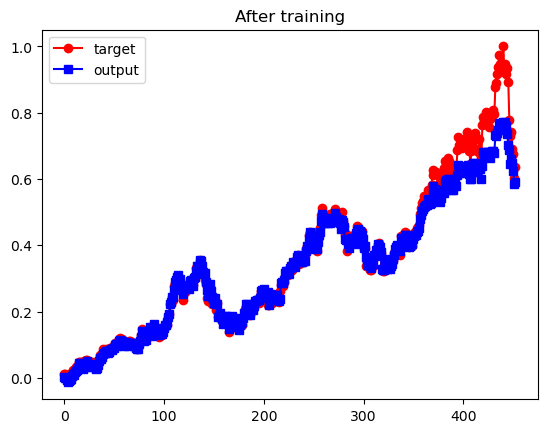

In [20]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.legend()
plt.title("After training")
plt.show()